In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

In [3]:
! gdown 1TKXHgSoUyO5wwitrVxvo4feJuR-Yb2QS

Downloading...
From: https://drive.google.com/uc?id=1TKXHgSoUyO5wwitrVxvo4feJuR-Yb2QS
To: /content/cancer_data.csv
100% 618/618 [00:00<00:00, 1.60MB/s]


In [4]:
df =  pd.read_csv('cancer_data.csv')
df.head()

,area,symmetry,diagnosis
0,10.330,20.92,1
1,7.044,25.21,1
2,7.118,17.21,0
3,2.863,16.80,0
4,7.489,19.31,1


In [5]:
from numpy.ma.core import exp
def sigmoid(z):
    g = 1/(1+(exp(-z)))
    return g

In [6]:
def predict(input,theta):
  x = theta[0]
  for n in range(len(input)):
    x += theta[n+1]*input[n]
  return sigmoid(x)

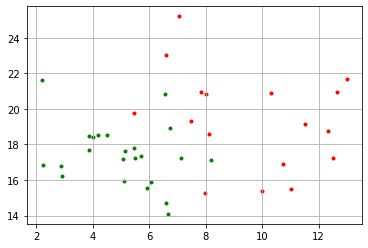

In [7]:
X = df[['area','symmetry']]
y = df['diagnosis']

X = X.to_numpy()
y = y.to_numpy()

sel0 = (y==0)
sel1 = (y==1)

plt.scatter(X[sel0,0],X[sel0,1], color='g', marker='.')
plt.scatter(X[sel1,0],X[sel1,1], color='r', marker='.')
plt.grid()

In [8]:
theta_test1 = np.array( [-16.5, 1, 0.5] )
theta_test2 = np.array( [-18, 0, 1] ) #x
theta_test3 = np.array( [-16,-2, 2] ) #x

predict([8, 17], theta_test1)

0.5

In [9]:
def costF(X, y, theta):
  global c #cost (distance between probability and labelled input)
  c = 0

  for i in range(len(X)):

    prob = predict(X[i,:], theta) #(defining the value of prob as the predict function)

    if y[i] == 1: #if statement for evaluating cost > if the labelled data's value is 1 (malignant), use cost equation when y == 1, and vice versa
      c -= math.log(prob)
    else:
      c -= math.log(1 - prob) #finding the total sum of costs; since the logs are negative

  c = c/len(X) #avg: sum of costs divided by total amount of data sets

  return c 

costF(X, y, theta_test1)

0.20350445227972883